<a href="https://colab.research.google.com/github/EfaOnyianta/Sales-Prediction/blob/main/Part_3_and_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LOADING DATA##

In [1]:
import pandas as pd
filename = '/content/sales_predictions.csv'

In [2]:
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning##


In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
# number of rows and columns in dataframe
df.shape

(8523, 12)

In [6]:
#check the column data types 
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
#check for duplicates and if any, drop
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [8]:
df.duplicated().sum()

0

In [9]:
#identify missing values
df.isna().sum()
# im deciding to input median 'Item_Weight', and apply missing for the missing "Outlet sizes"
#weight is not a constant nor does it seem to have a pattern, not much will be lost from dropping weight. Outlet size doesnt seem to have a pattern upon first inspection but at least with putting 
#it missing im not adding errors and can complete the tasks at hand and look at this later after consulting with a subject matter expert since this is not my expertise at the moment


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

There seems to be repeating data so finding the average weight and imputting that hopefully wont mess up the data too much and if anything show patters. 

In [11]:
mean_weight = df[ 'Item_Weight'].mean()
df['Item_Weight'].fillna(mean_weight, inplace = True)
df.isna().sum() 
#filling missing values in "Outlet_Size"


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
df['Outlet_Size'].fillna('Missing', inplace=True )
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
#checking for inconsistencies 
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [14]:
df['Item_Fat_Content']. value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [40]:
#regular and low fat are duplicated im going to add the regular together and the low fat values so just Low tar and regular remain
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('Lowfat', 'Low Fat')
df['Item_Fat_Content'].value_counts()
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [41]:
df['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [17]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [18]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [19]:
#obtaining min max and mean of all numerical coloumns
df['Item_Outlet_Sales'].min()

33.29

In [20]:
df['Item_Outlet_Sales'].max()

13086.9648

In [21]:
df['Item_Outlet_Sales'].mean()

2181.288913575032

In [22]:
df['Item_Weight'].min()

4.555

In [23]:
df['Item_Weight'].max()

21.35

In [24]:
df['Item_Weight'].mean()

12.857645184135976

In [25]:
df['Item_MRP'].min()

31.29

In [26]:
df['Item_MRP'].max()

266.8884

In [27]:
df['Item_MRP'].mean()

140.9927819781767

# I actually dropped item weight by accident iniitally and ran everything before i noticed. The mins and maxes were very different so dropping that information oddly seems to have impacted the data a lot so i am glad i made my initial choice to use the average weight for the items. 

# ***Exploratory Visuals*** part 3

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

Histogram to view the distributions of various features in your dataset.
Boxplot to view statistical summaries of various features in your dataset.
Heatmap of the correlation between features.

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [29]:
# im checking the data to make sure nothing has changed since the last time i downloaded
df.info()
# with the data below i can see that iten weight, item visibility, Item MRP, outlet establishment year, and iem outlet sales are variables that are numberic (int or float) and are therefore plottable/ can be visualized on a graph.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [30]:
df.head()
#upon further inspection Item MRP seems to have some possible correleation to sales. The high mrp on dairy turned out with that outlet having high sales of that item.There also may be a correlation with sales and item visibility, the items with 0 visibility seem to have the lowest sales. graphing/ plotting this data will either confirm or deny my suspisions. 


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
# Im going to plot a histogram of the item mrp and item outlet sales distribution
df['Item_MRP'].head()

0    249.8092
1     48.2692
2    141.6180
3    182.0950
4     53.8614
Name: Item_MRP, dtype: float64

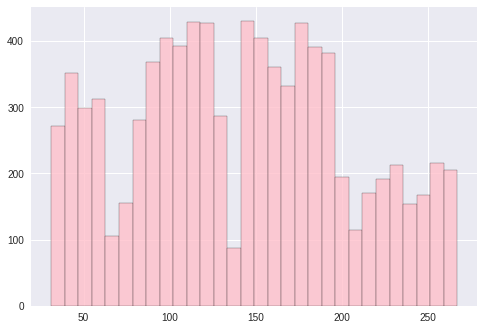

In [32]:
plt.style.use('seaborn')
df['Item_MRP'].hist(color='pink',alpha= 0.8,bins=30,
                           edgecolor='k')


In [33]:
df['Item_Visibility'].head()

0    0.016047
1    0.019278
2    0.016760
3    0.000000
4    0.000000
Name: Item_Visibility, dtype: float64

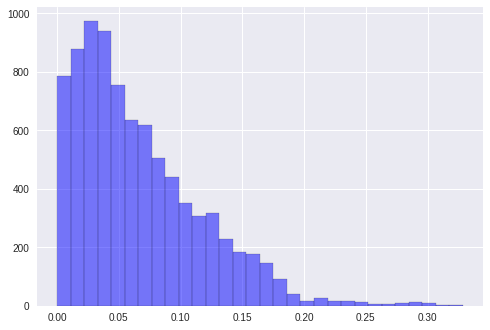

In [34]:
plt.style.use('seaborn')
df['Item_Visibility'].hist(color  ='blue',bins= 30,alpha= 0.5,
                             edgecolor='k')


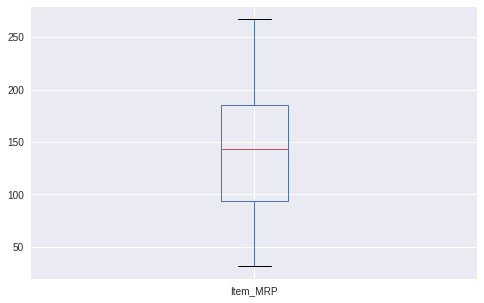

In [35]:
df.boxplot(['Item_MRP'],figsize=(8,5))
#no outliers in this coloumn
#there is also almost no skew to this data 

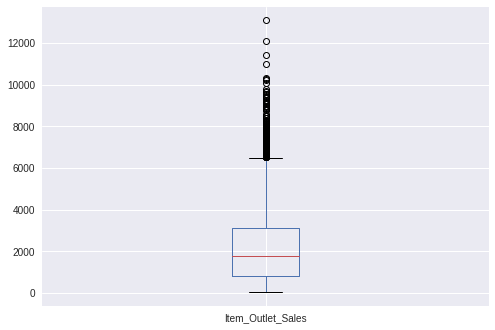

In [36]:
plt.style.use('seaborn')
df.boxplot('Item_Outlet_Sales');
# the data for this is very skewed and all the values lie out of the max but its very grouped there. 

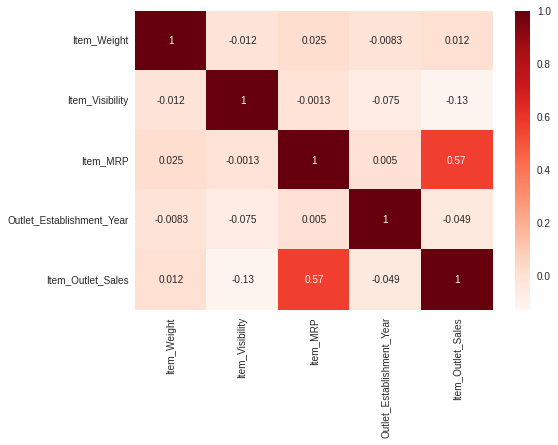

In [37]:
corr = df.corr()
sns.heatmap(corr,cmap= 'Reds', annot = True)
#MY THEORY WAS CORRECT, partially. THERE IS A .57 CORRELATION COEFFICIENT which indicates there is a moderate correllation.between item outlet sales and item MRP. 
# However item sales and item visibility had a coefficient of -.13 so there is no correlation there. 
#The other data visualizations told me many things, but none showed me a true correlation 

##Part 4: Explanatory Visuals and Analysis
We have cleaned the data and explored soem of the data and its patterns. Now its tiem to answer some questions

##Questions:
 Do " healthy" items sells more?
1. What items are most popular?
2. Do people prefer to buy low fat?

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [66]:
# What items sell the most?
items = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending = False)
items

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64

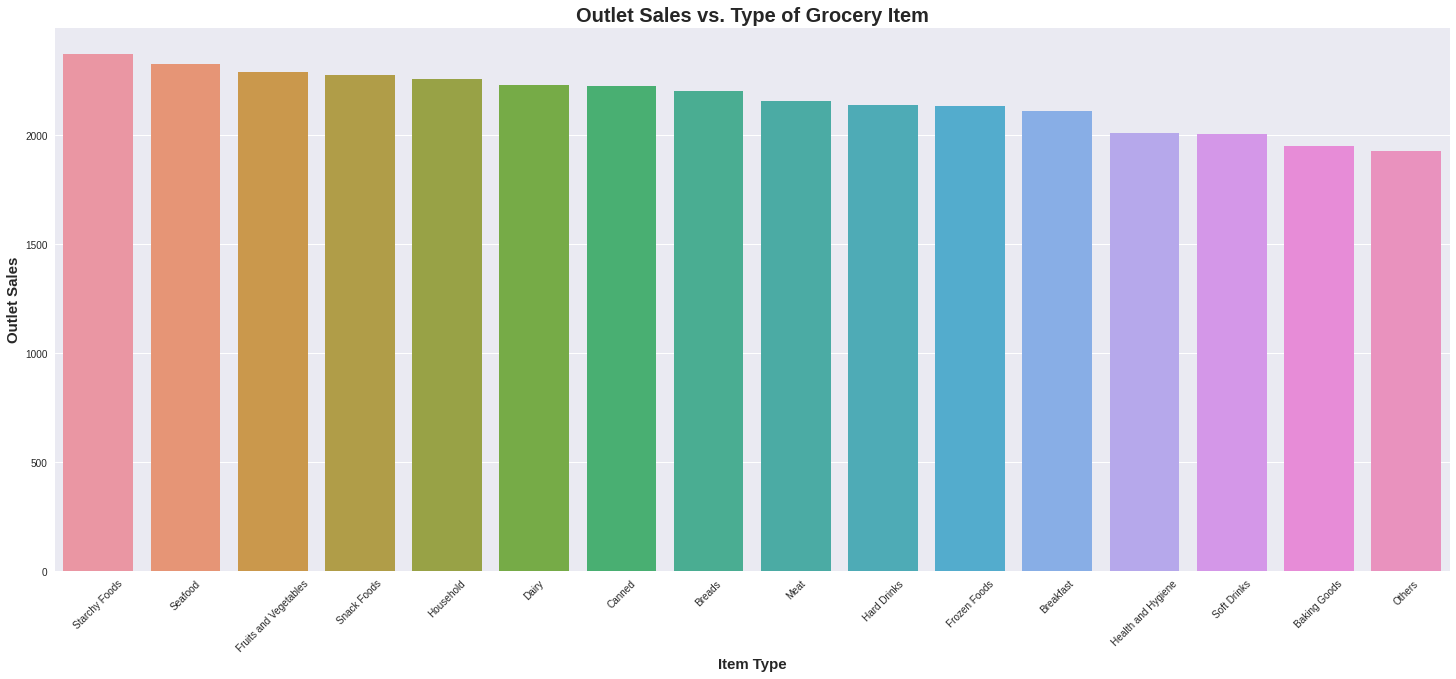

In [71]:
fig, ax = plt.subplots(figsize=(25,10))

ax = sns.barplot(data=df,x='Item_Type', y = 'Item_Outlet_Sales', order = items.index, ci = None)
plt.xticks(rotation = 45)
ax.set_title('Outlet Sales vs. Type of Grocery Item', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Item Type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Outlet Sales', fontsize = 15, fontweight = 'bold');

Starchy foods take the win! 

In [80]:
sales = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().sort_values(ascending = False)
sales

Item_Fat_Content
Regular    2224.561170
Low Fat    2157.711534
Name: Item_Outlet_Sales, dtype: float64

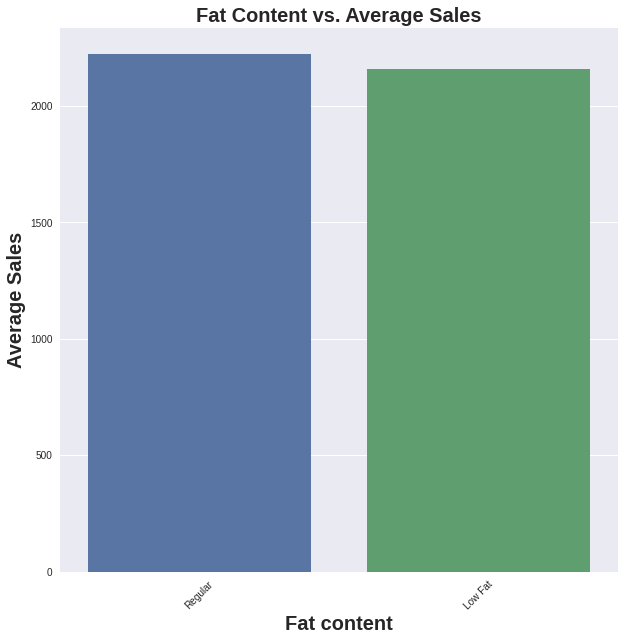

In [84]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sns.barplot(data=df,x='Item_Fat_Content', y = 'Item_Outlet_Sales', order = sales.index, ci = None)
plt.xticks(rotation = 45)
ax.set_title('Fat Content vs. Average Sales', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Fat content', fontsize = 20, fontweight = 'bold')
ax.set_ylabel('Average Sales', fontsize = 20, fontweight = 'bold');

Surprisingly Regular items outsold Low fat items. However peopel do like healthy foods with seafood and fruits and veggies coming in close after starchy foods. 